# Analysis of the auction and greedy algorithms

In [1]:
from __future__ import annotations

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

import json
from typing import List, Tuple

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
modular_funcs = 'Utility / Sqrt Sum, Product, Pow percent sum'
fixed_modular_funcs = 'Utility / Sqrt Sum, Product'
model_settings = ['t10_s2', 't15_s3', 't30_s6', 't40_s8']
setting_names = {
    't10_s2': '10 Tasks, 2 Servers',
    't15_s3': '15 Tasks, 3 Servers',
    't30_s6': '30 Tasks, 6 Servers',
    't40_s8': '40 Tasks, 8 Servers'
}

In [3]:
def plot_data_boxplot(folder: str, setting: str, algos: List[Tuple[str, bool]], plot: str,
                      metric: str = 'social welfare'):
    results_data = []
    for filename in os.listdir(folder):
        if setting in filename:
            with open(f'{folder}/{filename}') as file:
                file_data = json.load(file)
                results_data += file_data
    
    plot_data = [[] for _ in range(len(algos))]
    for data in results_data:
        for p, (algo, optimal) in enumerate(algos):
            if algo in data:
                if not optimal or ('solve status' in data[algo] and data[algo]['solve status'] == 'Optimal'):
                    plot_data[p].append(data[algo][metric])
    plot.boxplot(plot_data, vert=False, widths=0.9)

In [4]:
def plot_data_optimal(folder: str, setting: str, algos: List[Tuple[str, bool]], plot: str, optimal_algo: str, 
                      metric: str = 'social welfare'):
    results_data = []
    for filename in os.listdir(folder):
        if setting in filename:
            with open(f'{folder}/{filename}') as file:
                file_data = json.load(file)
                results_data += file_data
                
    for p, (algo, optimal) in enumerate(algos):
        plot_data = []
        for data in results_data:
            if algo in data and optimal_algo in data:
                if not optimal or ('solve status' in data[algo] and data[algo]['solve status'] == 'Optimal'):
                    plot_data.append(data[algo][metric] / data[optimal_algo][metric])
        plot.scatter(plot_data, p * np.ones(len(plot_data)))

In [5]:
def percent_diff(filenames: str, algo_1: str, algo_2: str, metric: str = 'social welfare'):
    percent = []
    for filename in filenames:
        with open(filename) as file:
            results_data = json.load(file)
        
        percent += [result[algo_1][metric] / result[algo_2][metric] for result in results_data 
                    if algo_1 in result and algo_2 in result]
    
    return round(np.mean(percent), 3)

## Auction

In [6]:
auction_algos = [
    (f'Critical Value Auction {modular_funcs}', False),
    ('Optimal DIA', False),
    ('Fixed VCG', True),
    ('Flexible VCG', True)
]
auction_names = ['Critical\nValue Auction',  'Decentralised\nIterative\nAuction', 
                 'Fixed\nVCG Auction', 'Flexible\nVCG Auction']
auction_folder = '../data/auctions'

print('Filenames: Length')
algos = set()
for filename in os.listdir(auction_folder):
    with open(f'{auction_folder}/{filename}') as file:
        json_data = json.load(file)
        print(f'\t{filename}: {len(json_data)}')
        algos.update(set(json_data[0].keys()))
        
print(f'\nAlgorithms: {algos}')

Filenames: Length
	auctions_paper_r_t10_s2_dt09-18_12-10-34.json: 44
	auctions_paper_r_t10_s2_dt09-19_19-34-58.json: 3
	auctions_paper_r_t10_s2_dt09-21_23-04-13.json: 2
	auctions_paper_r_t10_s2_dt09-26_01-25-30.json: 1
	auctions_paper_r_t10_s2_dt09-27_18-09-21.json: 2
	auctions_paper_r_t15_s3_dt07-22_11-55-31.json: 50
	auctions_paper_r_t15_s3_dt09-19_19-34-58.json: 2
	auctions_paper_r_t15_s3_dt10-09_17-19-20.json: 50
	auctions_paper_r_t30_s6_dt07-22_11-55-31.json: 50
	auctions_paper_r_t30_s6_dt07-28_23-48-03.json: 50
	auctions_paper_r_t30_s6_dt09-21_23-04-13.json: 50
	auctions_paper_r_t30_s6_dt09-27_18-20-05.json: 50
	auctions_paper_r_t30_s6_dt10-04_00-10-53.json: 50
	auctions_paper_r_t30_s6_dt10-05_22-08-45.json: 50
	auctions_paper_r_t40_s8_dt07-22_11-57-21.json: 45
	auctions_paper_r_t40_s8_dt09-21_23-04-13.json: 50
	auctions_paper_r_t40_s8_dt09-27_18-20-05.json: 50
	auctions_paper_r_t40_s8_dt10-04_00-10-11.json: 50
	auctions_paper_r_t40_s8_dt10-05_22-08-45.json: 49

Algorithms: {'Fix

### Social Welfare

Save file location: figs/auctions/eps/social_welfare.eps
Save file location: figs/auctions/png/social_welfare.png
Save file location: figs/auctions/pdf/social_welfare.pdf


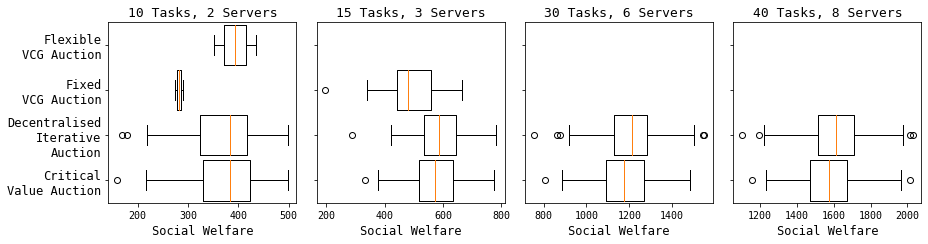

In [7]:
auction_fig, model_plots = plt.subplots(1, len(model_settings), figsize=(13, 3.5))
for model_setting, model_plot in zip(model_settings, model_plots):
    plot_data_boxplot(auction_folder, model_setting, auction_algos, model_plot)
    model_plot.set_title(setting_names[model_setting], fontsize=13)
    model_plot.set_xlabel('Social Welfare', fontsize=12)
    model_plot.set_yticklabels([''] * len(auction_algos))
model_plots[0].set_yticklabels(auction_names, fontsize=12)
plt.tight_layout()
save_plot('social_welfare', 'auctions')

### Revenue

Save file location: figs/auctions/eps/revenue.eps
Save file location: figs/auctions/png/revenue.png
Save file location: figs/auctions/pdf/revenue.pdf


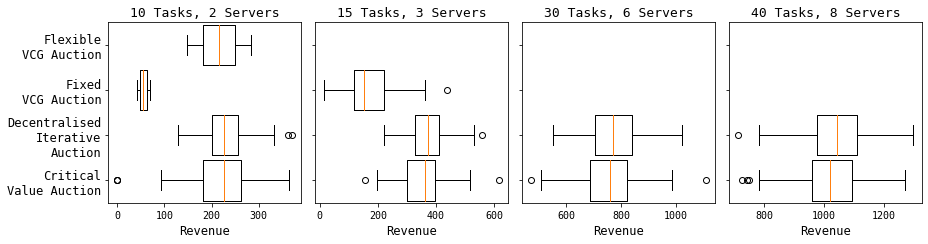

In [8]:
auction_fig, model_plots = plt.subplots(1, len(model_settings), figsize=(13, 3.5))
for model_setting, model_plot in zip(model_settings, model_plots):
    plot_data_boxplot(auction_folder, model_setting, auction_algos, model_plot, 'total revenue')
    model_plot.set_title(setting_names[model_setting], fontsize=13)
    model_plot.set_xlabel('Revenue', fontsize=12)
    model_plot.set_yticklabels([''] * len(auction_algos))
model_plots[0].set_yticklabels(auction_names, fontsize=12)

plt.tight_layout()
save_plot('revenue', 'auctions')

### Optimal Social Welfare Percentage Difference

c:\users\markm\anaconda3\envs\flexible-cloud-resource\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


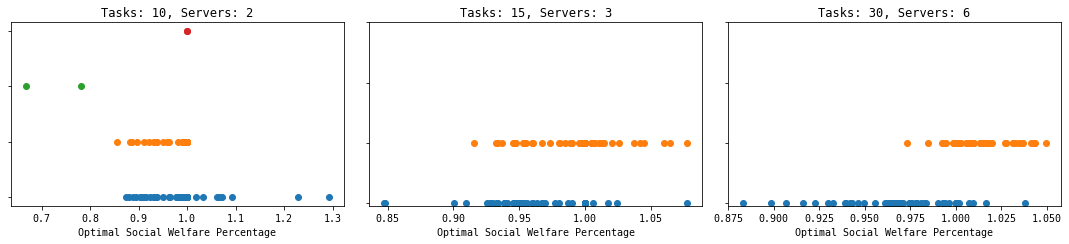

In [9]:
auction_fig, model_plots = plt.subplots(1, len(model_settings[:3]), figsize=(15, 3.5))
for model_setting, model_plot in zip(model_settings[:3], model_plots):
    plot_data_optimal(auction_folder, model_setting, auction_algos, model_plot, 'Flexible VCG')
    model_plot.set_title(model_setting.replace('t', 'Tasks: ').replace('_s', ', Servers: '))
    model_plot.set_xlabel('Optimal Social Welfare Percentage')
    model_plot.set_yticklabels([''] * len(auction_algos))
    model_plot.set_yticks(np.arange(0, len(auction_algos)))
model_plots[0].set_yticklabels([])
plt.tight_layout()

### Setting percentage difference

In [10]:
model_filenames = {model_setting: [f'{auction_folder}/{filename}' for filename in os.listdir(auction_folder)
                                   if model_setting in filename]
                   for model_setting in model_settings}

print(f'\tPercentage difference in social welfare')
print(f'Critical Value Auction / Decentralised Iteratibe: '
      f'{percent_diff(model_filenames["t10_s2"], f"Critical Value Auction {modular_funcs}", "Optimal DIA")}, '
      f'{percent_diff(model_filenames["t15_s3"], f"Critical Value Auction {modular_funcs}", "Optimal DIA")}, '
      f'{percent_diff(model_filenames["t30_s6"], f"Critical Value Auction {modular_funcs}", "Optimal DIA")}, '
      f'{percent_diff(model_filenames["t40_s8"], f"Critical Value Auction {modular_funcs}", "Optimal DIA")}')

	Percentage difference in social welfare
Critical Value Auction / Decentralised Iteratibe: 1.013, 0.981, 0.975, 0.977


## Greedy

In [11]:
greedy_algos = [
    ('Fixed Optimal', True),
    (f'Greedy {modular_funcs}', False),
    ('Flexible Optimal', True),
    ('Server Relaxed Flexible Optimal', False)
]
greedy_names = ['Fixed\nOptimal', 'Greedy\nAlgorithm',
                'Flexible\nOptimal', 'Server\nRelaxed\nOptimal']
greedy_folder = '../data/greedy'

print('Filenames: Length')
algos = set()
for filename in os.listdir(greedy_folder):
    with open(f'{greedy_folder}/{filename}') as file:
        json_data = json.load(file)
        print(f'\t{filename}: {len(json_data)}')
        algos.update(set(json_data[0].keys()))
        
print(f'Algos: {algos}')

Filenames: Length
	greedy_paper_r_t10_s2_dt09-18_12-10-34.json: 5
	greedy_paper_r_t10_s2_dt09-19_19-34-58.json: 12
	greedy_paper_r_t10_s2_dt09-26_01-10-53.json: 2
	greedy_paper_r_t10_s2_dt10-08_23-30-03.json: 1
	greedy_paper_r_t15_s3_dt09-16_16-21-25.json: 10
	greedy_paper_r_t15_s3_dt09-19_19-34-58.json: 4
	greedy_paper_r_t30_s6_dt07-27_13-24-29.json: 50
	greedy_paper_r_t30_s6_dt09-21_23-15-05.json: 50
	greedy_paper_r_t40_s8_dt07-14_15-06-16.json: 50
	greedy_paper_r_t40_s8_dt09-21_23-15-05.json: 50
	greedy_paper_r_t40_s8_dt10-08_16-29-05.json: 1
	lower_bound_paper_r_t40_s8_dt10-09_16-54-11.json: 50
	lower_bound_paper_r_t40_s8_dt10-09_18-00-38.json: 50
Algos: {'Greedy Utility * deadline / Sqrt Sum, Sum, Pow percent sum', 'Greedy Utility * deadline / Sqrt Sum, Product, Percent Sum', 'Greedy Utility * deadline / Sqrt Sum, Sum, Fixed Task Speeds', 'Fixed Greedy Utility * deadline / Sqrt Sum, Random', 'Greedy Utility / Sqrt Sum, Random, Percent Sum', 'Fixed Greedy Utility / Sqrt Sum, Produc

### Social welfare

Save file location: figs/greedy/eps/social_welfare.eps
Save file location: figs/greedy/png/social_welfare.png
Save file location: figs/greedy/pdf/social_welfare.pdf


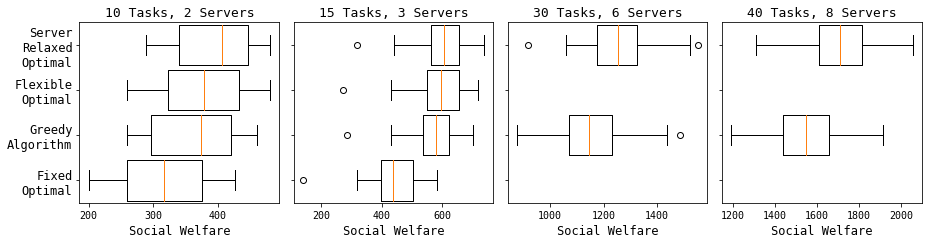

In [12]:
greedy_fig, model_plots = plt.subplots(1, len(model_settings), figsize=(13, 3.5))
for model_setting, model_plot in zip(model_settings, model_plots):
    plot_data_boxplot(greedy_folder, model_setting, greedy_algos, model_plot)
    model_plot.set_title(setting_names[model_setting], fontsize=13)
    model_plot.set_xlabel('Social Welfare', fontsize=12)
    model_plot.set_yticklabels([''] * len(greedy_algos))
model_plots[0].set_yticklabels(greedy_names, fontsize=12)

plt.tight_layout()
save_plot('social_welfare', 'greedy')

### Optimal social welfare percentage difference

c:\users\markm\anaconda3\envs\flexible-cloud-resource\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


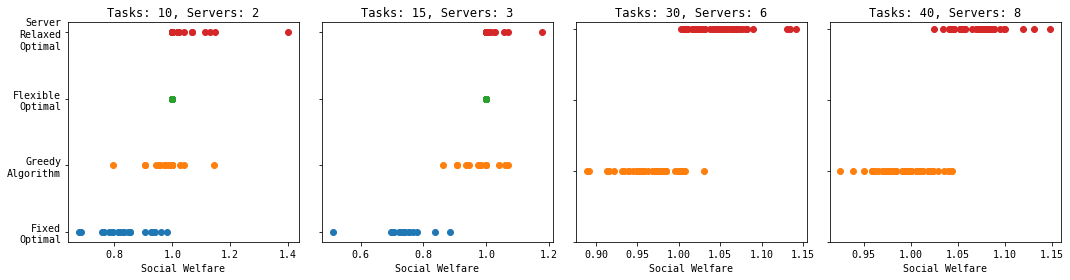

In [13]:
greedy_fig, model_plots = plt.subplots(1, len(model_settings), figsize=(15, 4))
for model_setting, model_plot in zip(model_settings, model_plots):
    plot_data_optimal(greedy_folder, model_setting, greedy_algos, model_plot, 'Flexible Optimal')
    model_plot.set_title(model_setting.replace('t', 'Tasks: ').replace('_s', ', Servers: '))
    model_plot.set_xlabel('Social Welfare')
    model_plot.set_yticklabels([''] * len(greedy_algos))
    model_plot.set_yticks(np.arange(0, len(greedy_algos)))
model_plots[0].set_yticklabels(greedy_names)

plt.tight_layout()

### Setting percentage difference

In [14]:
model_filenames = {model_setting: [f'{greedy_folder}/{filename}' for filename in os.listdir(greedy_folder)
                                   if model_setting in filename]
                   for model_setting in model_settings}

print(f'Percentage difference in social welfare')
print(f'\tFixed / Flexible: '
      f'{percent_diff(model_filenames["t10_s2"], "Fixed Optimal", "Flexible Optimal")}%, '
      f'{percent_diff(model_filenames["t15_s3"], "Fixed Optimal", "Flexible Optimal")}%')
print(f'\tGreedy / Flexible: '
      f'{percent_diff(model_filenames["t10_s2"], f"Greedy {modular_funcs}", "Flexible Optimal")}%, '
      f'{percent_diff(model_filenames["t15_s3"], f"Greedy {modular_funcs}", "Flexible Optimal")}%')
print(f'\tGreedy / Fixed: '
      f'{percent_diff(model_filenames["t10_s2"], "Fixed Optimal", f"Greedy {modular_funcs}")}%, '
      f'{percent_diff(model_filenames["t15_s3"], "Fixed Optimal", f"Greedy {modular_funcs}")}%, '
      f'{percent_diff(model_filenames["t30_s6"], "Fixed Optimal", f"Greedy {modular_funcs}")}%, '
      f'{percent_diff(model_filenames["t40_s8"], "Fixed Optimal", f"Greedy {modular_funcs}")}%')
print(f'\tGreedy / Relaxed: ' 
      f'{percent_diff(model_filenames["t10_s2"], f"Greedy {modular_funcs}", "Server Relaxed Flexible Optimal")}%, '
      f'{percent_diff(model_filenames["t15_s3"], f"Greedy {modular_funcs}", "Server Relaxed Flexible Optimal")}%, '
      f'{percent_diff(model_filenames["t30_s6"], f"Greedy {modular_funcs}", "Server Relaxed Flexible Optimal")}%, '
      f'{percent_diff(model_filenames["t40_s8"], f"Greedy {modular_funcs}", "Server Relaxed Flexible Optimal")}%')

Percentage difference in social welfare
	Fixed / Flexible: 0.838%, 0.737%
	Greedy / Flexible: 0.98%, 0.976%
	Greedy / Fixed: 0.857%, 0.76%, 0.841%, 0.813%
	Greedy / Relaxed: 0.936%, 0.95%, 0.918%, 0.923%


### Lower bound

In [15]:
lower_bound_filename = f'{greedy_folder}/lower_bound_paper_r_t40_s8_dt10-09_16-54-11.json'
value_funcs = modular_funcs.replace('Utility / Sqrt Sum', 'Value')
    
print(f'Value Greedy / Best Greedy: ' 
      f'{percent_diff([lower_bound_filename],  f"Greedy {value_funcs}", f"Greedy {modular_funcs}")}')

Value Greedy / Best Greedy: 1.001
